# Bayesian Coin Toss
$$\begin{eqnarray}
  P(\theta|D) = P(D|\theta) \; P(\theta) \; / \; P(D)
\end{eqnarray}$$

In [107]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt 
import seaborn as sns

## Bernoulli Distribution - the likelihood function
A very simple discrete distribute that assigns probabilities to sample spaces with binary outcomes. 

$belief \in [0,1]$ Belief that a heads will show up.

In [2]:
belief=0.44 

outcome $k  \in \{0, 1\}$ k is the outcome of the coin toss.

In [3]:
k = 0

Probability of the outcome given the belief

In [4]:
(belief**k)*(1-belief)**(1-k)

0.56

For multiple flips of the coin given by the set $\{k_1, ..., k_N\}$, the probability of the sequence occuring is simply the product of the probability of each flip occuring. Where belief is represented as $\theta$

$$\begin{eqnarray}
P(\{k_1, ..., k_N\} | \theta) &=& \prod_{i} P(k_i | \theta) \\
&=& \prod_{i} \theta^{k_i} (1 - \theta)^{1-{k_i}}
\end{eqnarray}$$

In the case of N flips, if we denote by $s$(success?) the number of heads appearing, then the formula above becomes

$$\begin{eqnarray}
P(s, N | \theta) = \theta^s (1 - \theta)^{N-s}
\end{eqnarray}$$

It is the probability of seeing s heads in N flips given a $\theta$ value. This will be useful for our posterior distribution.

## Beta Distribution - the prior

$$P(\theta | \alpha, \beta) = \theta^{\alpha - 1} (1 - \theta)^{\beta - 1} / B(\alpha, \beta)$$

$$B (\alpha,\beta)=\int _{0}^{1}\theta^{\alpha-1}(1-\theta)^{\beta-1}d \theta$$

Beta distribution is a continous distribution with the denominator acting as a normalizing constant so that the PDF sums to 1.

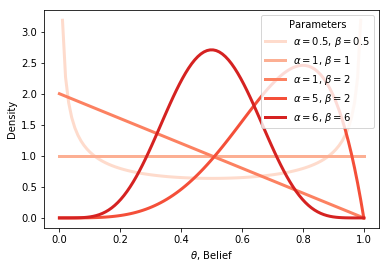

In [106]:
sns.set_palette("Reds")
x = np.linspace(0, 1, 100)
params = [
    (0.5, 0.5),
    (1, 1),
    (1, 2),
    (5, 2),
    (6, 6)
]
for p in params:
    y = beta.pdf(x, p[0], p[1])
    plt.plot(x, y, label="$\\alpha=%s$, $\\beta=%s$" % p, lw=3)
plt.xlabel("$\\theta$, Belief")
plt.ylabel("Density")
plt.legend(title="Parameters")
plt.show()

We chose Beta for prior because 
- It's defined on the interval $[0,1]$, which is the same interval that $\theta$ exists over.
- It possesses two shape parameters known as $\alpha$ and $\beta$, which give it significant flexibility. This flexibility provides us with a lot of choice in how we model our beliefs. As $\alpha$ becomes larger the bulk of the probability distribution moves towards the right (a coin biased to come up heads more often), whereas an increase in $\beta$ moves the distribution towards the left (a coin biased to come up tails more often). This is portrayed in the plot above.
- Most importantly, its a conjugate prior for the Bernoulli distribution.

## Conjugate Priors
A conjugate prior is a choice of prior distribution, that when coupled with a specific type of likelihood function, provides a posterior distribution that is of the same family as the prior distribution. We can use a posterior as a prior distribution in a new Bayesian updating procedure.

Conjugate priors are convenient from the computational perspective as they provide close form expression posterior, i.e., we wouldn't have to calculate integrals and marginals to obtain the posterior. 



## Posterior
Substituting likelihood function and beta prior into bayes equation
$$\begin{eqnarray}
P(\theta | s, N) &=& \frac {P(s, N | \theta) P(\theta)} {P(s, N)} \\
&=& \frac {\theta^s (1- \theta)^{N-s} \theta^{\alpha - 1} (1-\theta)^{\beta - 1}} {\left[ B(\alpha,\beta) P(s, N)\right]} \\
&=& \frac {\theta^{s + \alpha -1} (1- \theta)^{N-s + \beta - 1}} { B(s + \alpha, N - s + \beta)}
\end{eqnarray}$$




In case you are wondering about the denominator, all we did was substitute the prior with a beta distribution in numerator and denominator. Remember the marginal likelihood is 
$$\Pr(s, N) = \int_{0}^{1} P(s, N | \theta) P(\theta)$$

Our posterior simply becomes 
$$\text{beta}(\theta|s+\alpha, N-s+\beta)$$

In [103]:
a =12
b = 12
prior = (a.numerator, b.numerator)

In [104]:
#Obervations
N = 50
success = 22
n_alpha = success+a
n_beta = N - success + b
posterior = (n_alpha.numerator, n_beta.numerator)

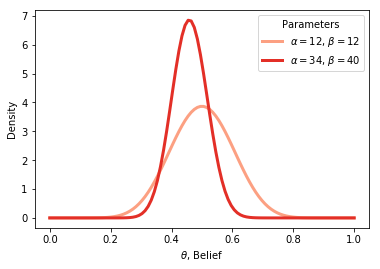

In [105]:
sns.set_palette(sns.color_palette("Reds", n_colors=2))
y = beta.pdf(x, prior[0], prior[1])
plt.plot(x, y, label="$\\alpha=%s$, $\\beta=%s$" % prior, lw=3)
y = beta.pdf(x, posterior[0], posterior[1])
plt.plot(x, y, label="$\\alpha=%s$, $\\beta=%s$" % posterior, lw=3)

plt.xlabel("$\\theta$, Belief")
plt.ylabel("Density")
plt.legend(title="Parameters")
plt.show()

In [102]:
#Mean
n_alpha/(n_alpha+n_beta)

0.4594594594594595